# Volcanic Impact in Obs

* Wenchang Yang (wenchang@princeton.edu)
* Department of Geosciences, Princeton University

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

import geoxarray
from geoplots import mapplot
import xlearn
from climindex import get_climate_index
from geoplots import xticksmonth

!date
%matplotlib notebook

Mon Apr  2 14:59:54 EDT 2018


In [2]:
das = dict()
ncfile = '/tigress/wenchang/data/cru/cru_ts4.01.1901.2016.tmp.dat.nc'
data_name = 'tmp'
lons_sahel = slice(-20,10)
lats_sahel = slice(10,20)

In [3]:
ds = xr.open_dataset(ncfile)
da = ds[data_name]
# anomaly from clim
da_clim = da.groupby('time.month').mean('time')
da = da.groupby('time.month') - da_clim
da = da.resample(time='MS').mean('time')

ts = da.sel(lon=lons_sahel, lat=lats_sahel).geo.fldmean().load() # Sahel-mean 

## Agung 1963

### Seasonal mean

In [7]:
# raw data
year_erupt = 1963
years_before = slice(f'{year_erupt - 5}', f'{year_erupt - 1}')
years_after = slice(f'{year_erupt}', f'{year_erupt + 2}')
units = '$^0$C'

damean = da.sel(time=years_before).groupby('time.month').mean('time')
daa = da.sel(time=years_after).groupby('time.month') - damean # anomaly
daa = daa.resample(time='QS-Dec').mean('time').isel(time=slice(1,None)) # seasonal mean
das['pre.anom.agung'] = daa

<IPython.core.display.Javascript object>


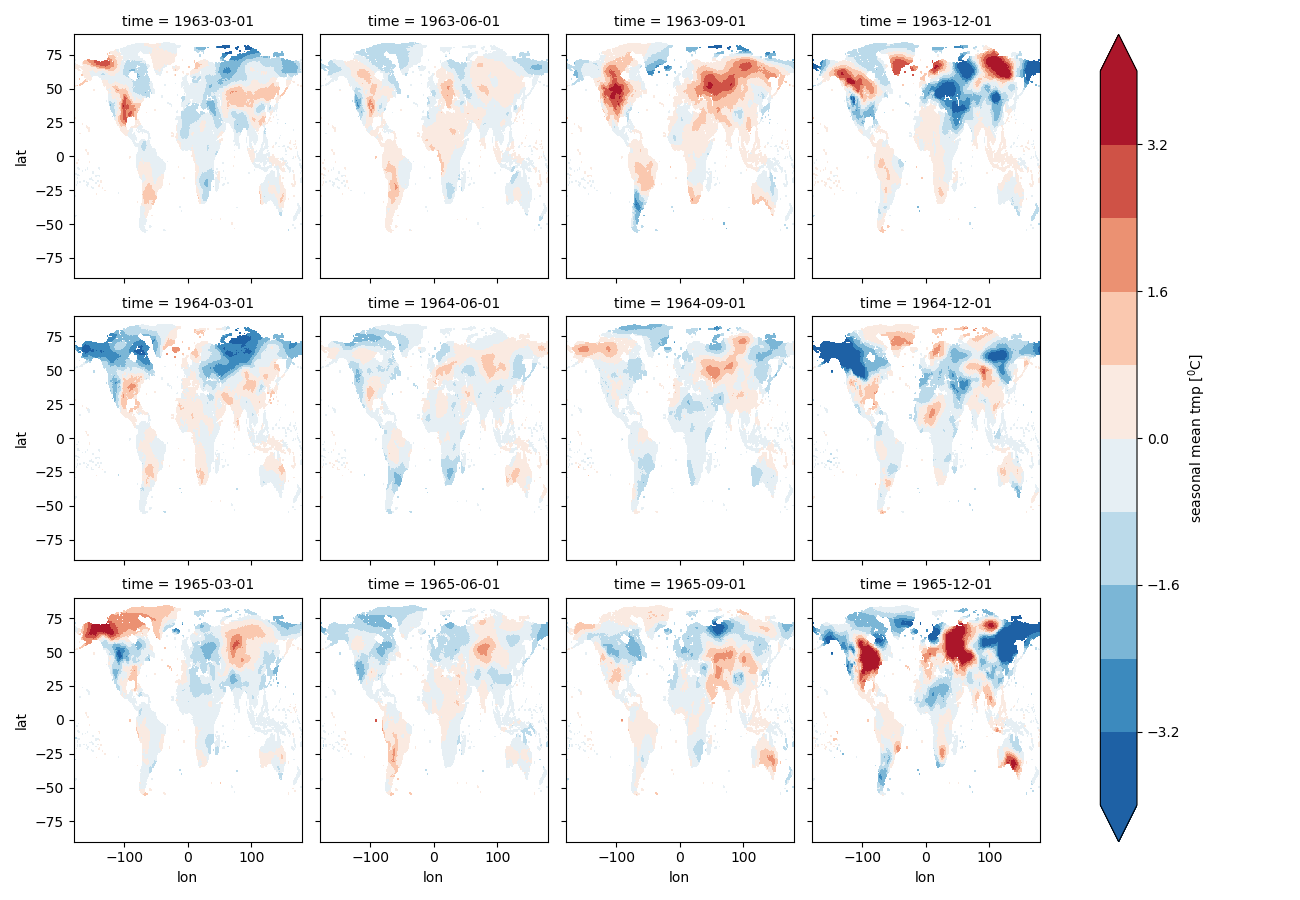

In [8]:
daa.rename(f'seasonal mean {data_name} [{units}]')\
    .plot(col='time', col_wrap=4, robust=True, levels=10)

<IPython.core.display.Javascript object>


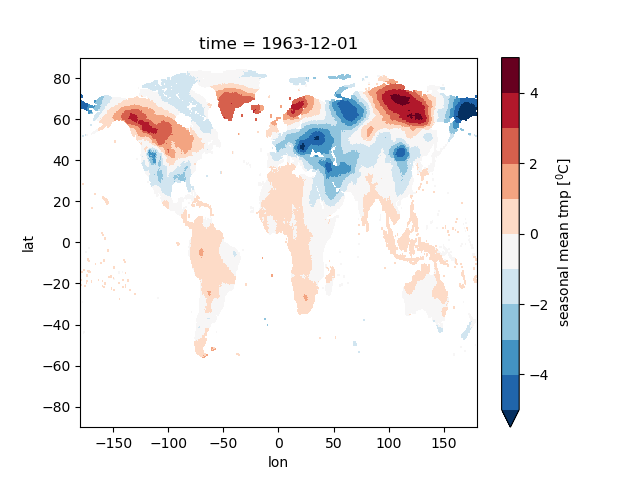

In [10]:
# following winter
daa.sel(time=f'{year_erupt}-12').rename(f'seasonal mean {data_name} [{units}]')\
    .plot(robust=True, levels=10)

<IPython.core.display.Javascript object>


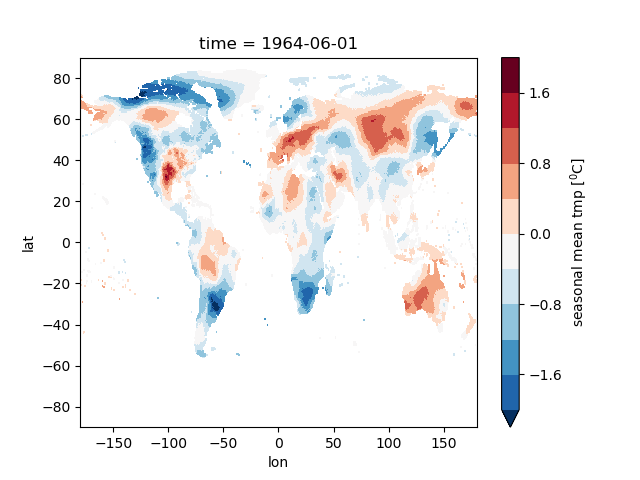

In [17]:
# next-year summer
daa.sel(time=f'{year_erupt+1}-06').rename(f'seasonal mean {data_name} [{units}]')\
    .plot(robust=True, levels=10)

<IPython.core.display.Javascript object>


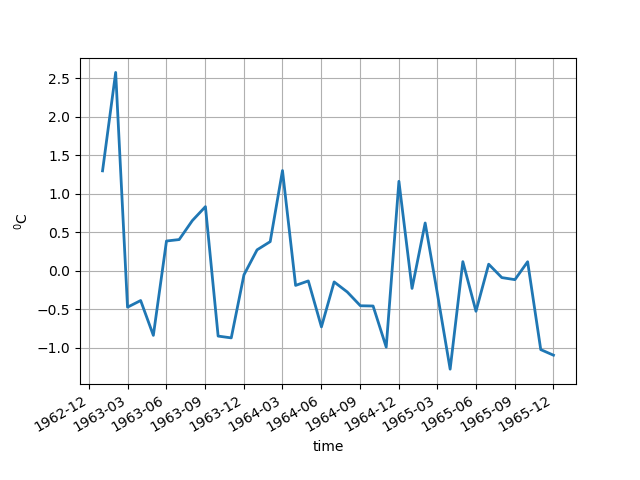

Text(0,0.5,'$^0$C')

In [14]:
# Sahel rainfall time series
ts_ = ts.sel(time=years_after).groupby('time.month') \
    - ts.sel(time=years_before).groupby('time.month').mean('time') # anomaly
ts_.plot()
xticksmonth(range(3,13,3))
plt.grid(True)
plt.ylabel(units)
# plt.ylim(-1,1.5)

### Zonal mean

In [18]:
# raw data
year_erupt = 1963
years_before = slice(f'{year_erupt - 5}', f'{year_erupt - 1}')
years_after = slice(f'{year_erupt}', f'{year_erupt + 2}')

damean = da.sel(time=years_before).groupby('time.month').mean('time')
daa = da.sel(time=years_after).groupby('time.month') - damean # anomaly
daa = daa.mean('lon')

<IPython.core.display.Javascript object>


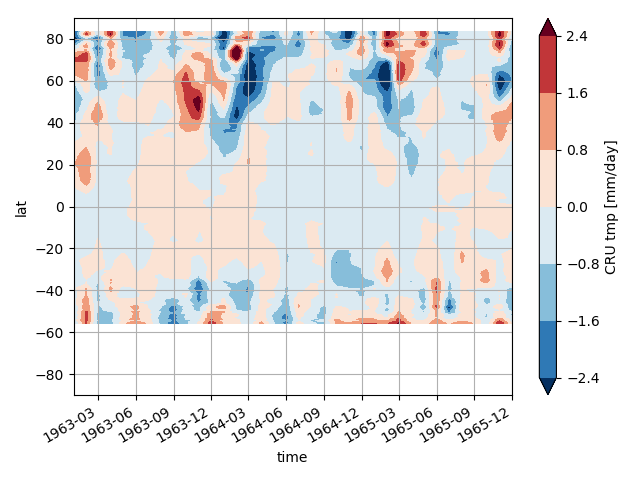

In [19]:
daa.rename(f'CRU {data_name} [{units}]') \
    .plot.contourf(x='time', y='lat', robust=True)
xticksmonth(range(3,13,3))
plt.grid(True)
plt.tight_layout()

## Chichon 1982

In [4]:
year_erupt = 1982
years_before = slice(f'{year_erupt - 5}', f'{year_erupt - 1}')
years_after = slice(f'{year_erupt}', f'{year_erupt + 2}')
units = 'mm/day'

damean = da.sel(time=years_before).groupby('time.month').mean('time')
daa = da.sel(time=years_after).groupby('time.month') - damean
daa = daa.resample(time='QS-Dec').mean('time').isel(time=slice(1,None))
das['pre.anom.chichon'] = daa

<IPython.core.display.Javascript object>


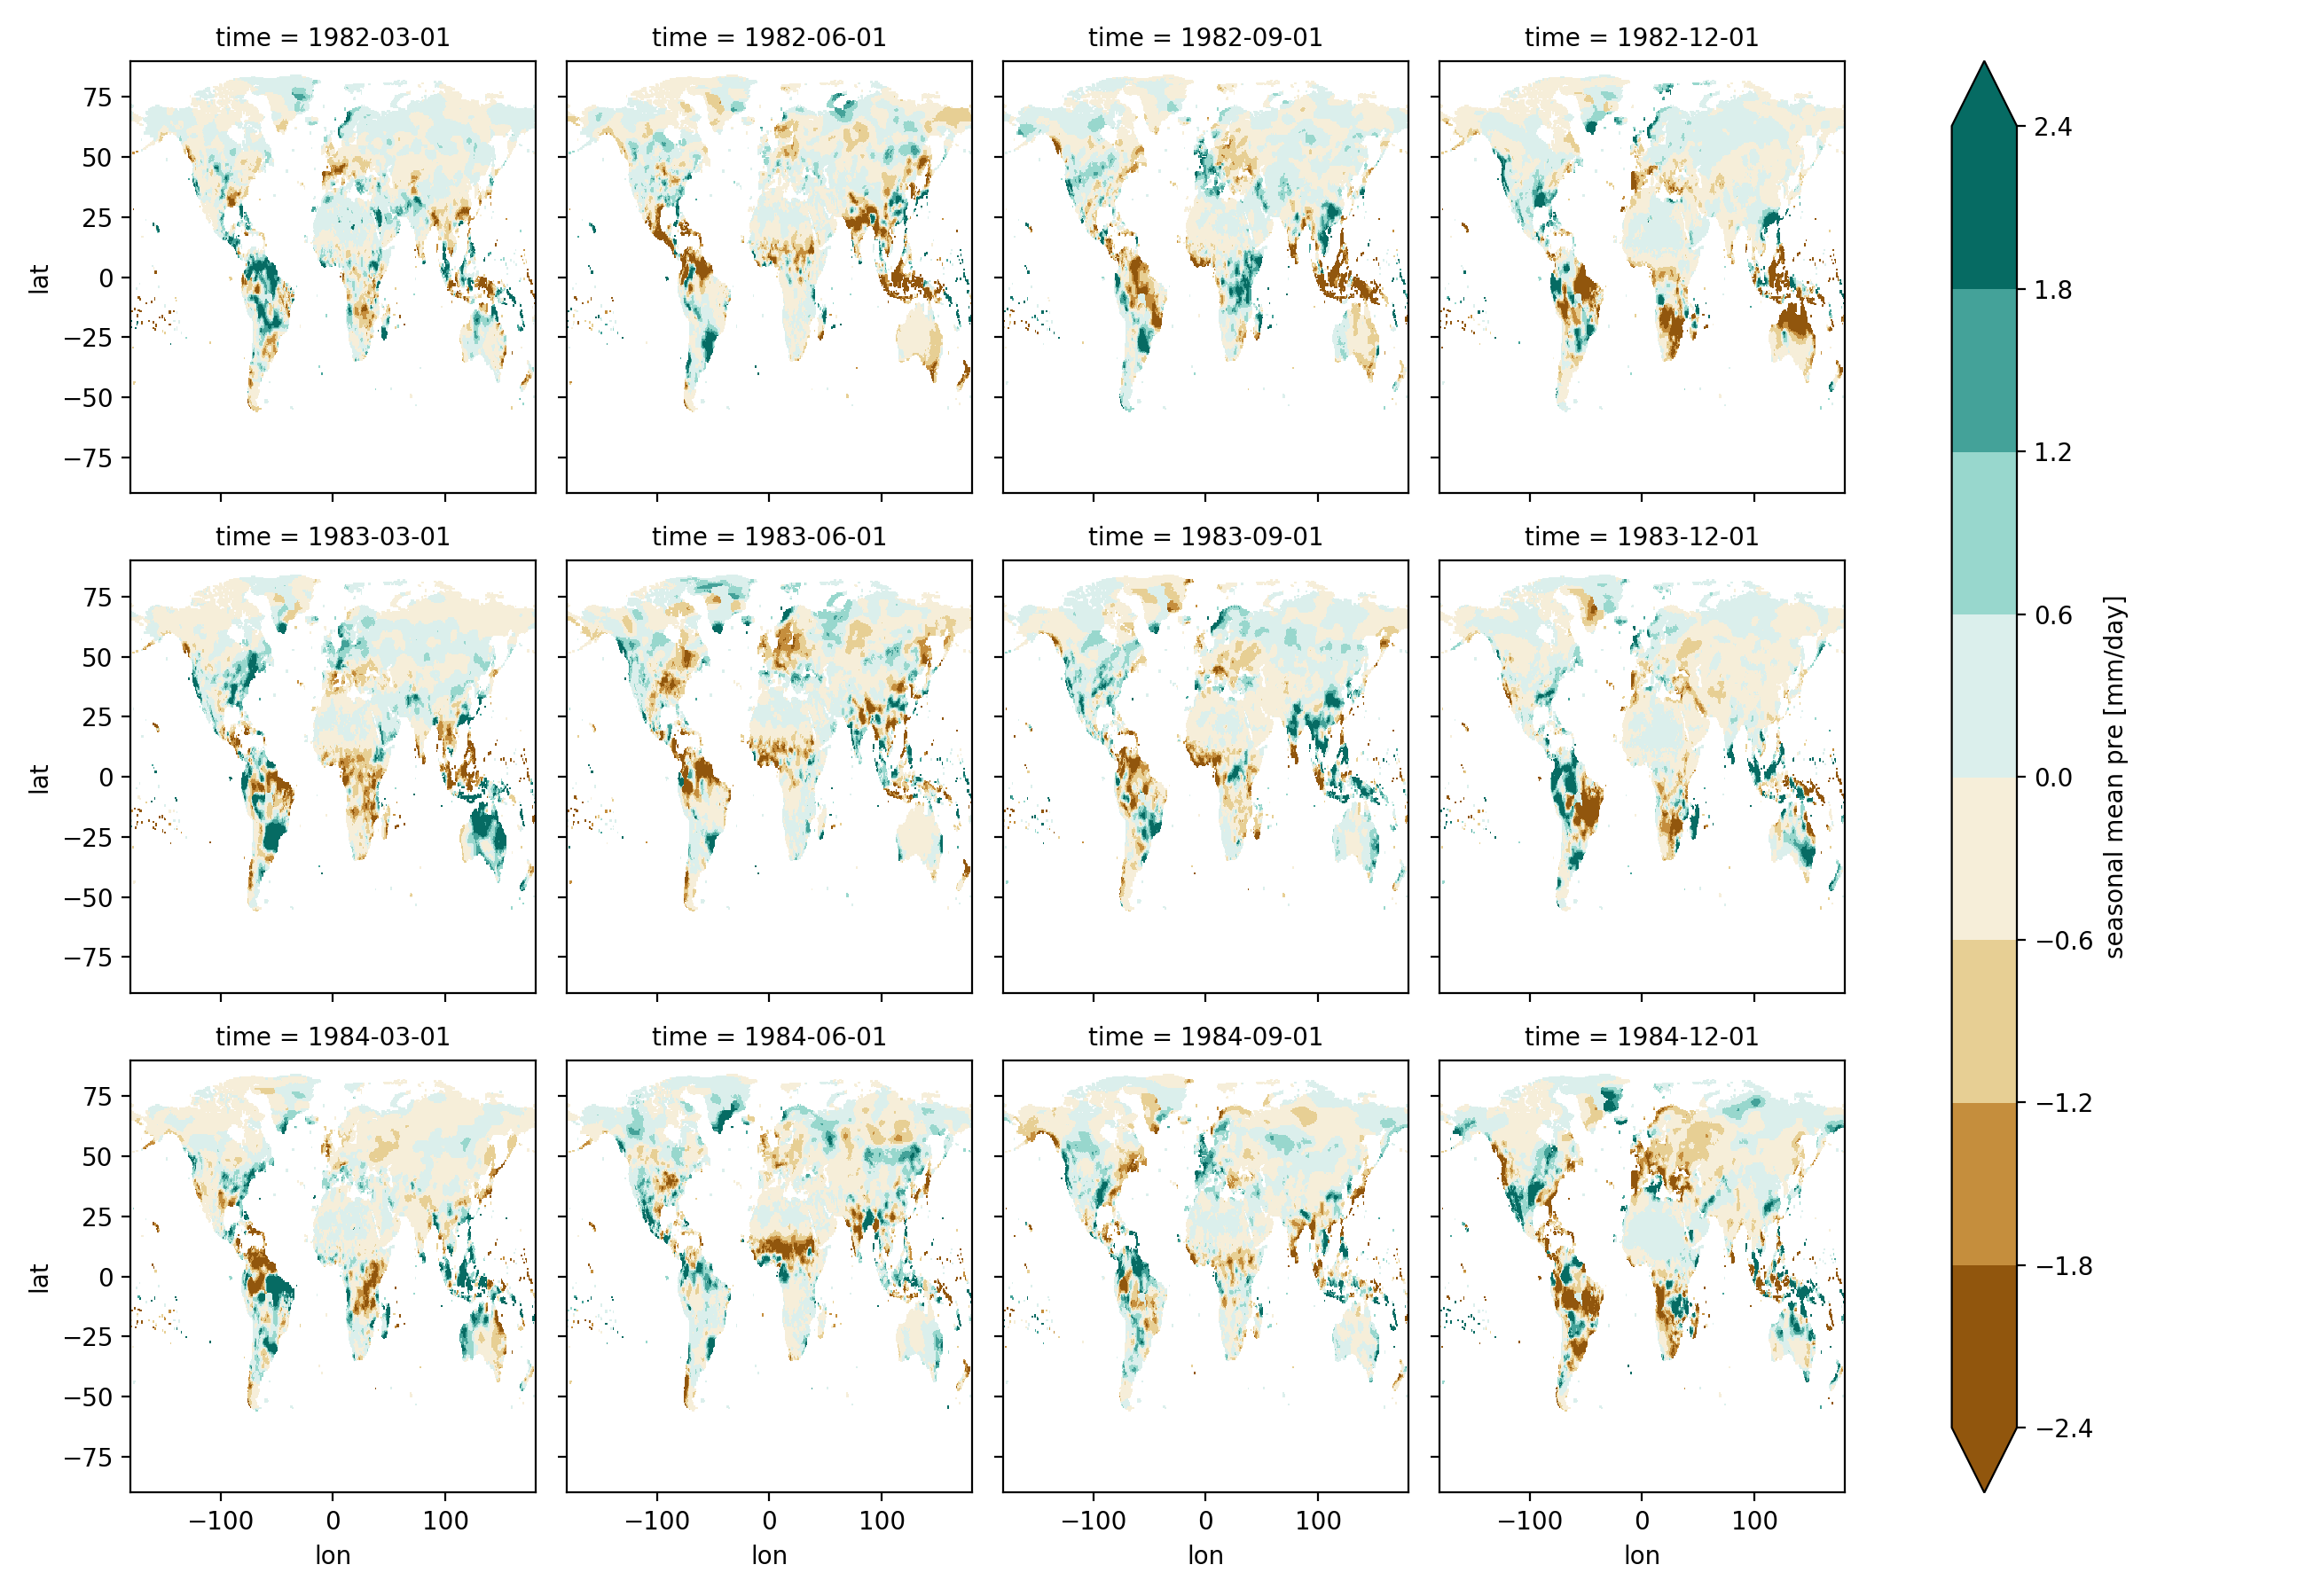

In [113]:
daa.pipe(lambda x: x/30.0).rename(f'seasonal mean {data_name} [{units}]')\
    .plot(col='time', col_wrap=4, robust=True, levels=10, cmap='BrBG')

<IPython.core.display.Javascript object>


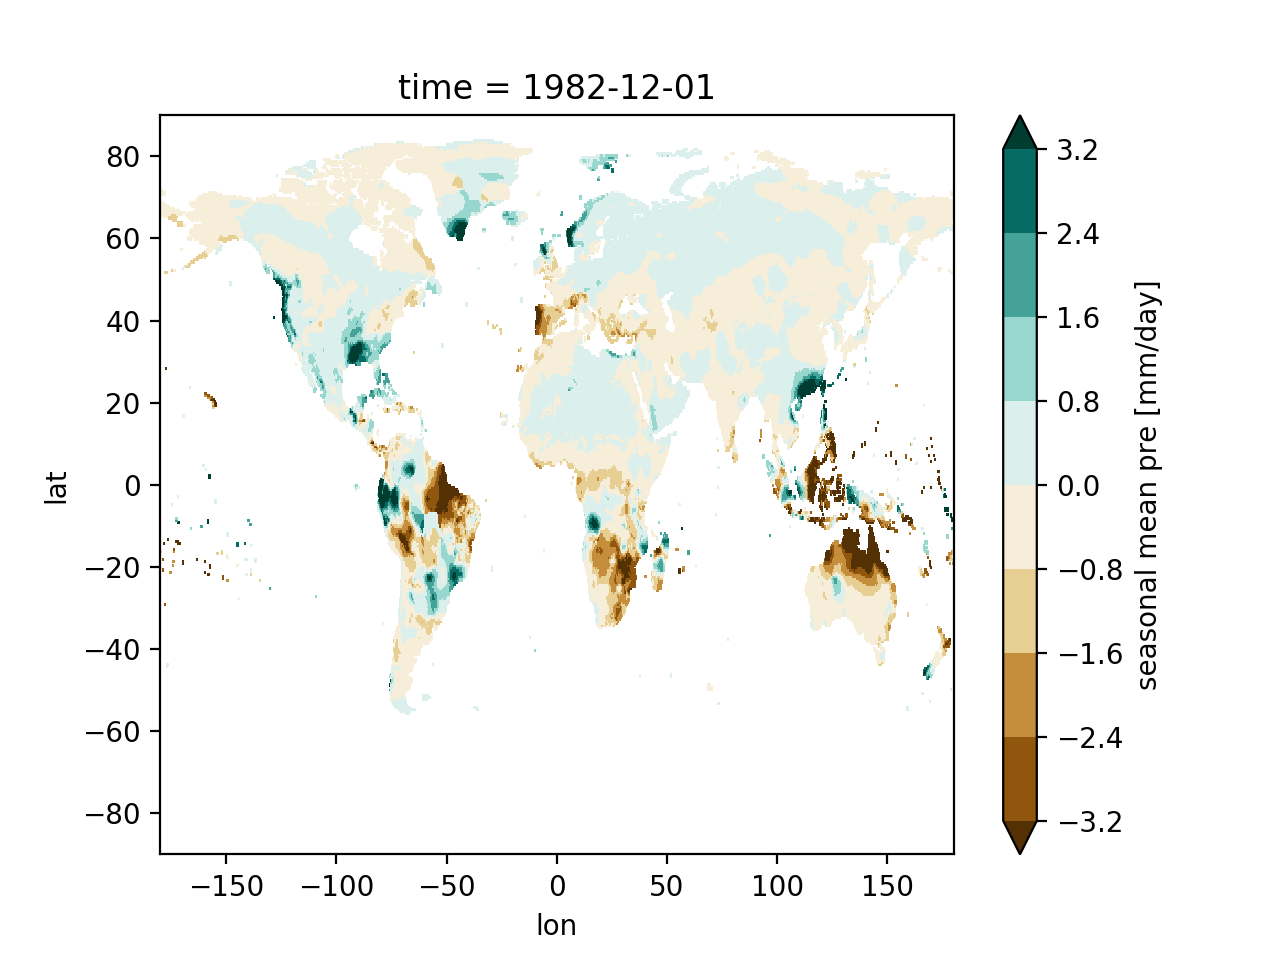

In [114]:
# following winter
daa.sel(time=f'{year_erupt}-12').pipe(lambda x: x/30.0).rename(f'seasonal mean {data_name} [{units}]')\
    .plot(robust=True, levels=10, cmap='BrBG')

<IPython.core.display.Javascript object>


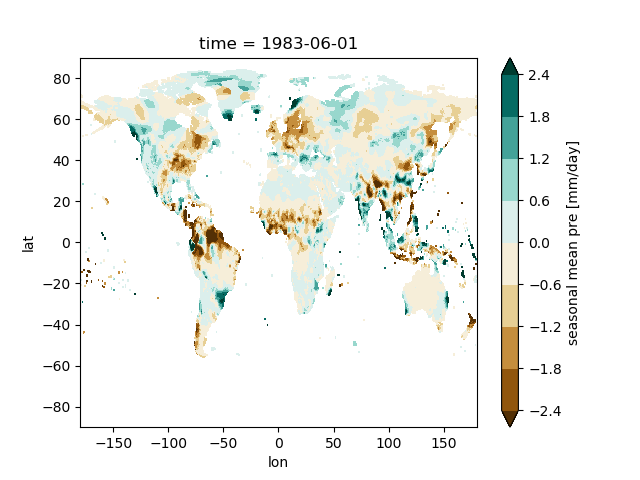

In [7]:
# next-year summer
daa.sel(time=f'{year_erupt+1}-06').pipe(lambda x: x/30.0).rename(f'seasonal mean {data_name} [{units}]')\
    .plot(robust=True, levels=10, cmap='BrBG')

<IPython.core.display.Javascript object>


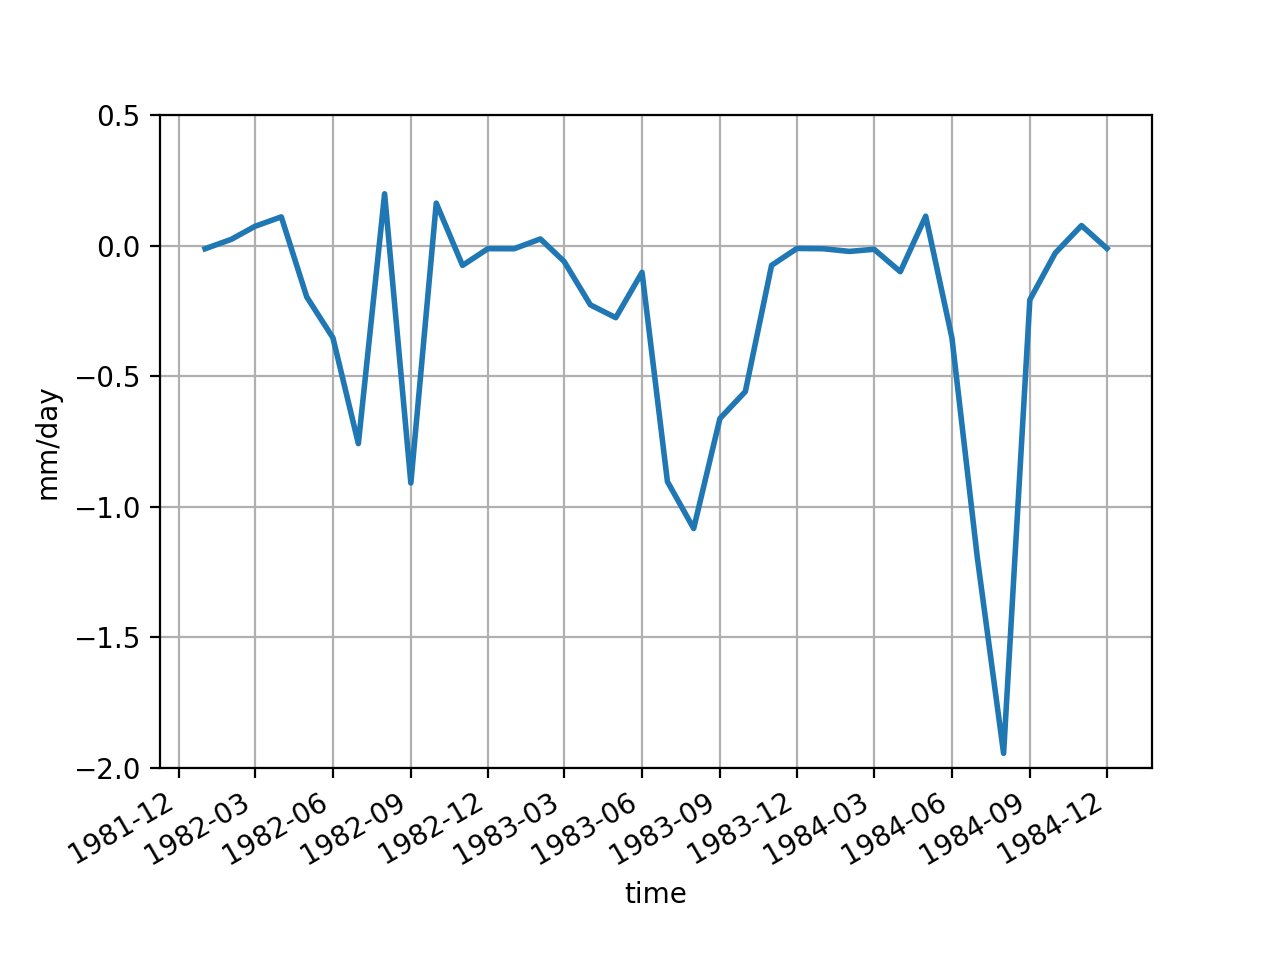

(-2, 0.5)

In [128]:
# Sahel rainfall time series
ts_ = ts.sel(time=years_after).groupby('time.month') \
    - ts.sel(time=years_before).groupby('time.month').mean('time') # anomaly
ts_.pipe(lambda x: x/30.).plot()
xticksmonth(range(3,13,3))
plt.grid(True)
plt.ylabel(units)
plt.ylim(-2,.5)

### Zonal mean

In [15]:
# raw data
year_erupt = 1982
years_before = slice(f'{year_erupt - 5}', f'{year_erupt - 1}')
years_after = slice(f'{year_erupt}', f'{year_erupt + 2}')
units = 'mm/day'

damean = da.sel(time=years_before).groupby('time.month').mean('time')
daa = da.sel(time=years_after).groupby('time.month') - damean # anomaly
daa = daa.mean('lon')

<IPython.core.display.Javascript object>


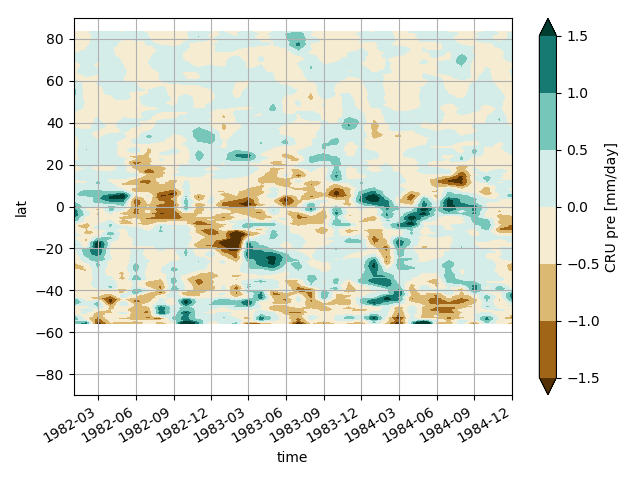

In [16]:
daa.pipe(lambda x:x/30.).rename(f'CRU {data_name} [{units}]') \
    .plot.contourf(x='time', y='lat', robust=True, cmap='BrBG')
xticksmonth(range(3,13,3))
plt.grid(True)
plt.tight_layout()

## Pinatubo 1991

In [11]:
year_erupt = 1991
years_before = slice(f'{year_erupt - 5}', f'{year_erupt - 1}')
years_after = slice(f'{year_erupt}', f'{year_erupt + 2}')
units = 'mm/day'

damean = da.sel(time=years_before).groupby('time.month').mean('time')
daa = da.sel(time=years_after).groupby('time.month') - damean
daa = daa.resample(time='QS-Dec').mean('time').isel(time=slice(1,None))
das['pre.anom.pinatubo'] = daa

<IPython.core.display.Javascript object>


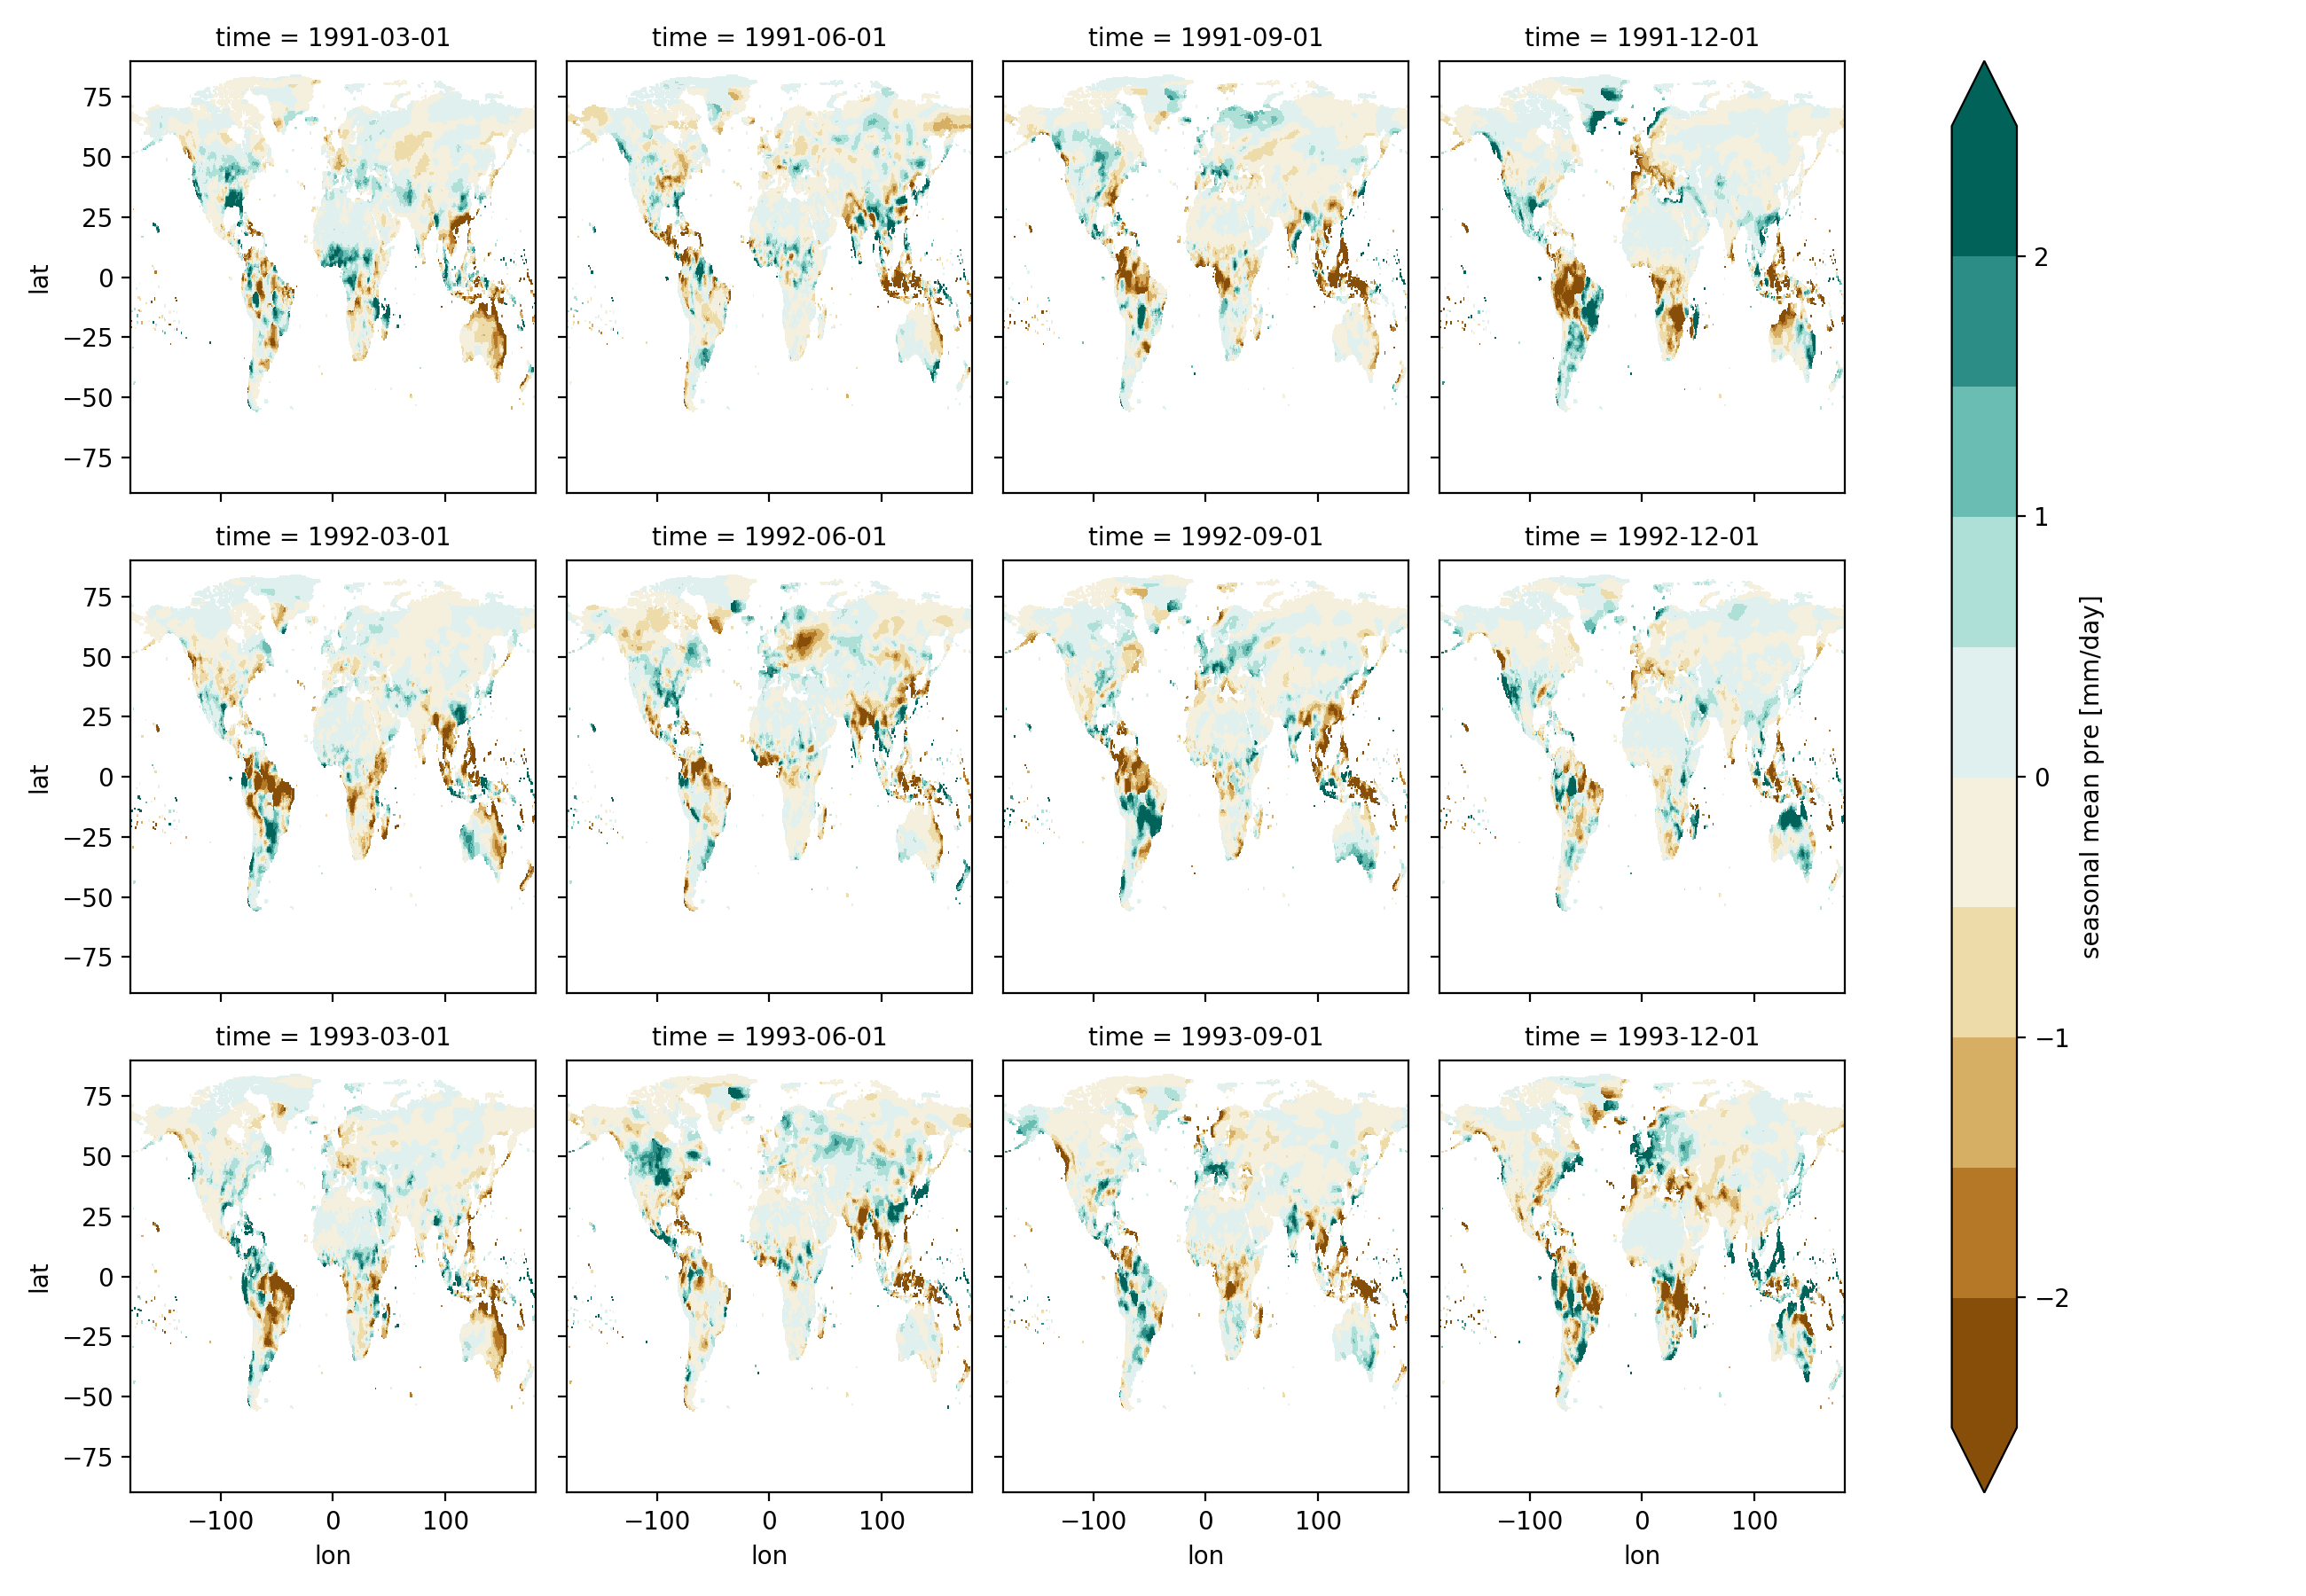

In [119]:
daa.pipe(lambda x: x/30.0).rename(f'seasonal mean {data_name} [{units}]')\
    .plot(col='time', col_wrap=4, robust=True, levels=10, cmap='BrBG')

<IPython.core.display.Javascript object>


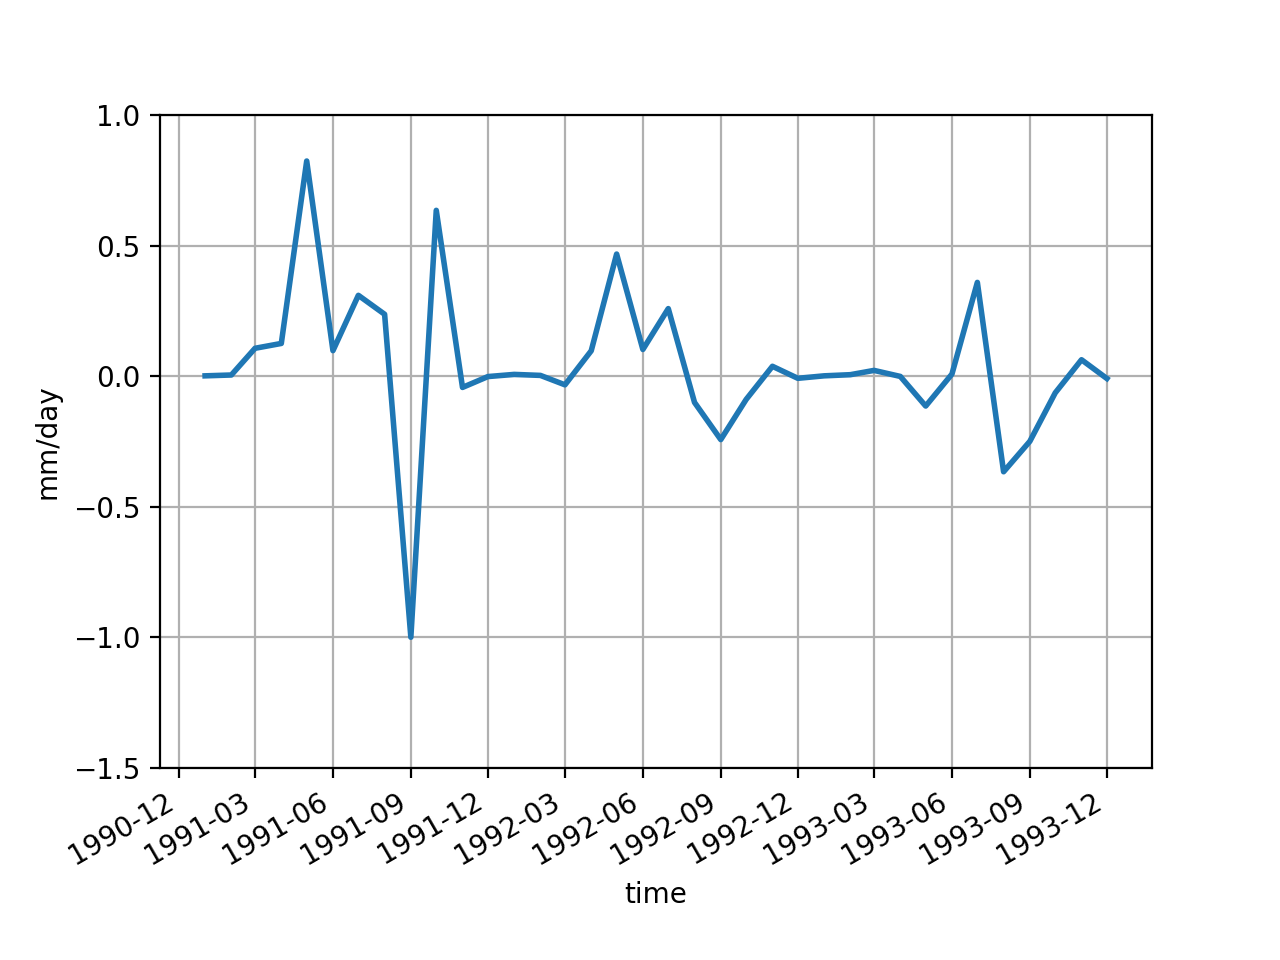

(-1.5, 1)

In [13]:
# Sahel rainfall time series
ts_ = ts.sel(time=years_after).groupby('time.month') \
    - ts.sel(time=years_before).groupby('time.month').mean('time') # anomaly
ts_.pipe(lambda x: x/30.).plot()
xticksmonth(range(3,13,3))
plt.grid(True)
plt.ylabel(units)
plt.ylim(-1.5,1)

## ENSO removed

In [175]:
nino = xr.DataArray.from_series(get_climate_index('nino34')) \
    .rename({'index': 'time'}) \
    .resample(time='MS').mean('time')
nino1901_2016 = nino.sel(time=slice('1901', '2016'))
r = da.learn.regress(nino1901_2016)
da_res = da - r.coef_da * nino1901_2016

//home/wenchang/wython/xlearn/linear_model.py:91: RuntimeWarning: invalid value encountered in multiply
  b = np.empty((n_grids, n_features)) * np.nan
//home/wenchang/wython/xlearn/linear_model.py:123: RuntimeWarning: invalid value encountered in multiply
  p = np.empty( (n_grids, n_features) ) * np.nan
//home/wenchang/wython/xlearn/linear_model.py:129: RuntimeWarning: invalid value encountered in true_divide
  t = self.coef_ / se
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0

In [72]:
#  ENSO removed
year_erupt = 1963
years_before = slice(f'{year_erupt - 5}', f'{year_erupt - 1}')
years_after = slice(f'{year_erupt}', f'{year_erupt + 2}')
units = 'mm/day'

damean = da_res.sel(time=years_before).groupby('time.month').mean('time')
daa = da_res.sel(time=years_after).groupby('time.month') - damean # anomaly
daa = daa.resample(time='QS-Dec').mean('time').isel(time=slice(1,None)) # seasonal mean
das['pre.anom.res.agung'] = daa

<IPython.core.display.Javascript object>


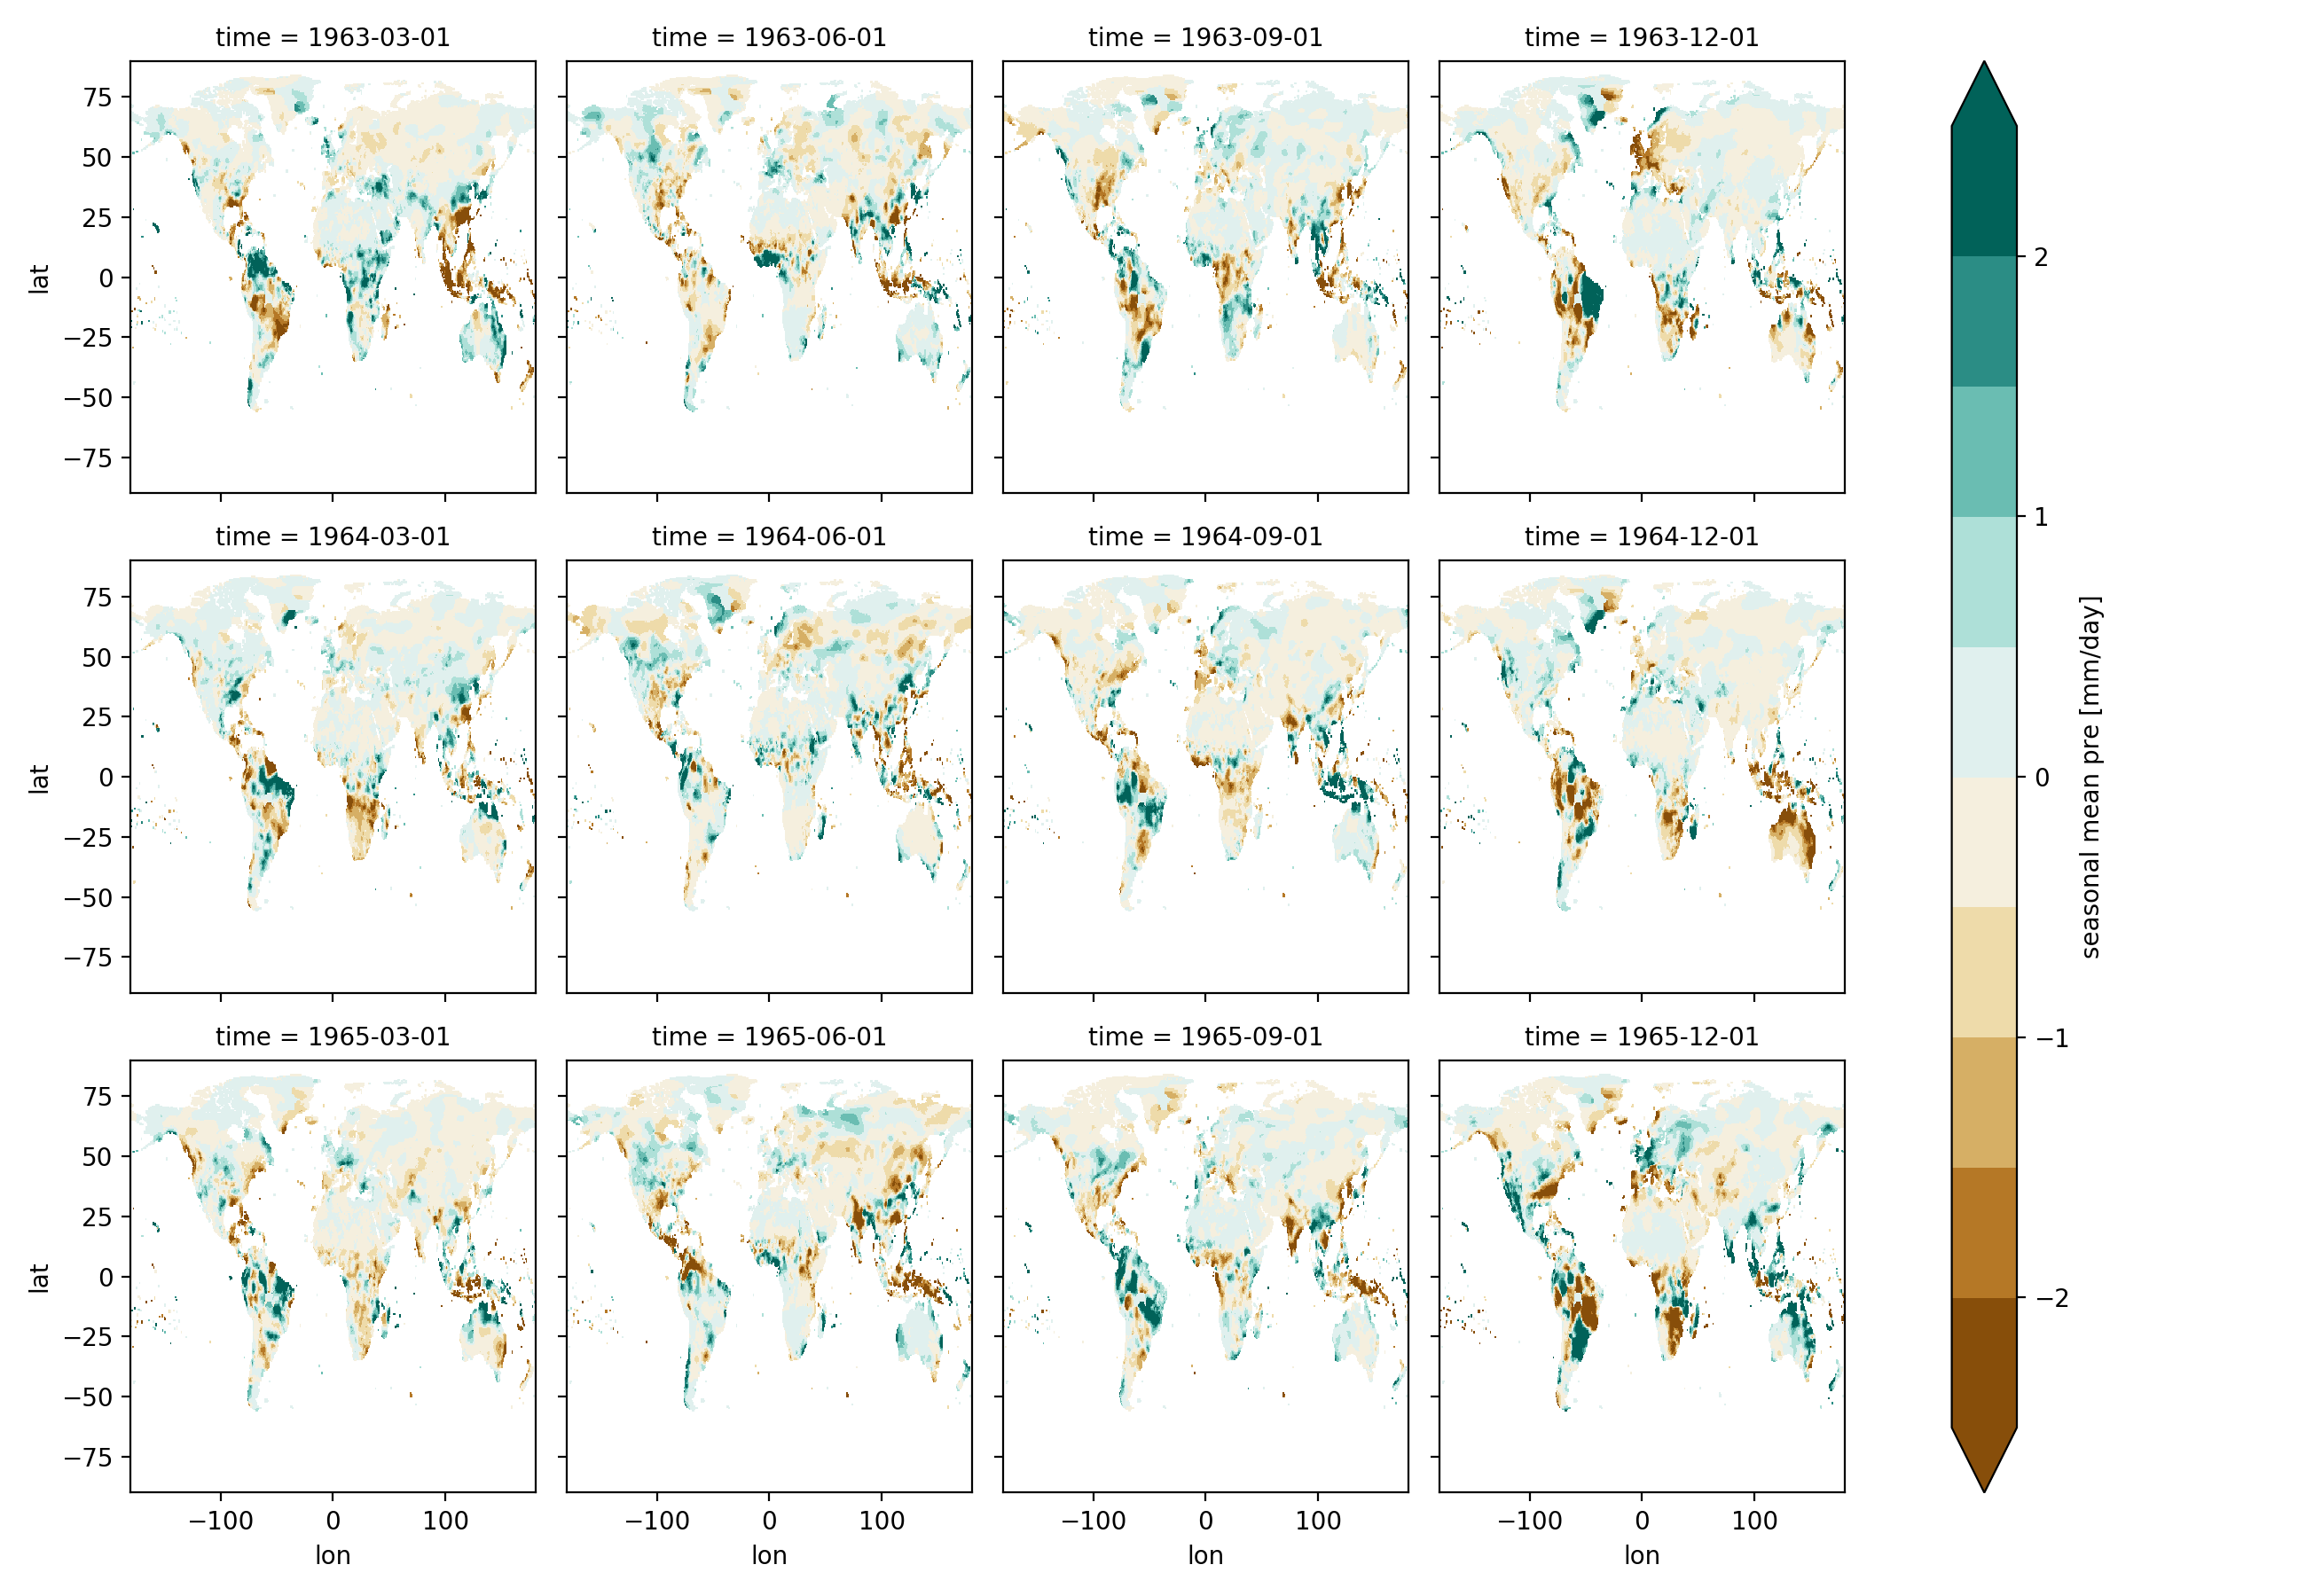

In [63]:
daa.pipe(lambda x: x/30.0).rename(f'seasonal mean {data_name} [{units}]')\
    .plot(col='time', col_wrap=4, robust=True, levels=10, cmap='BrBG')

<IPython.core.display.Javascript object>


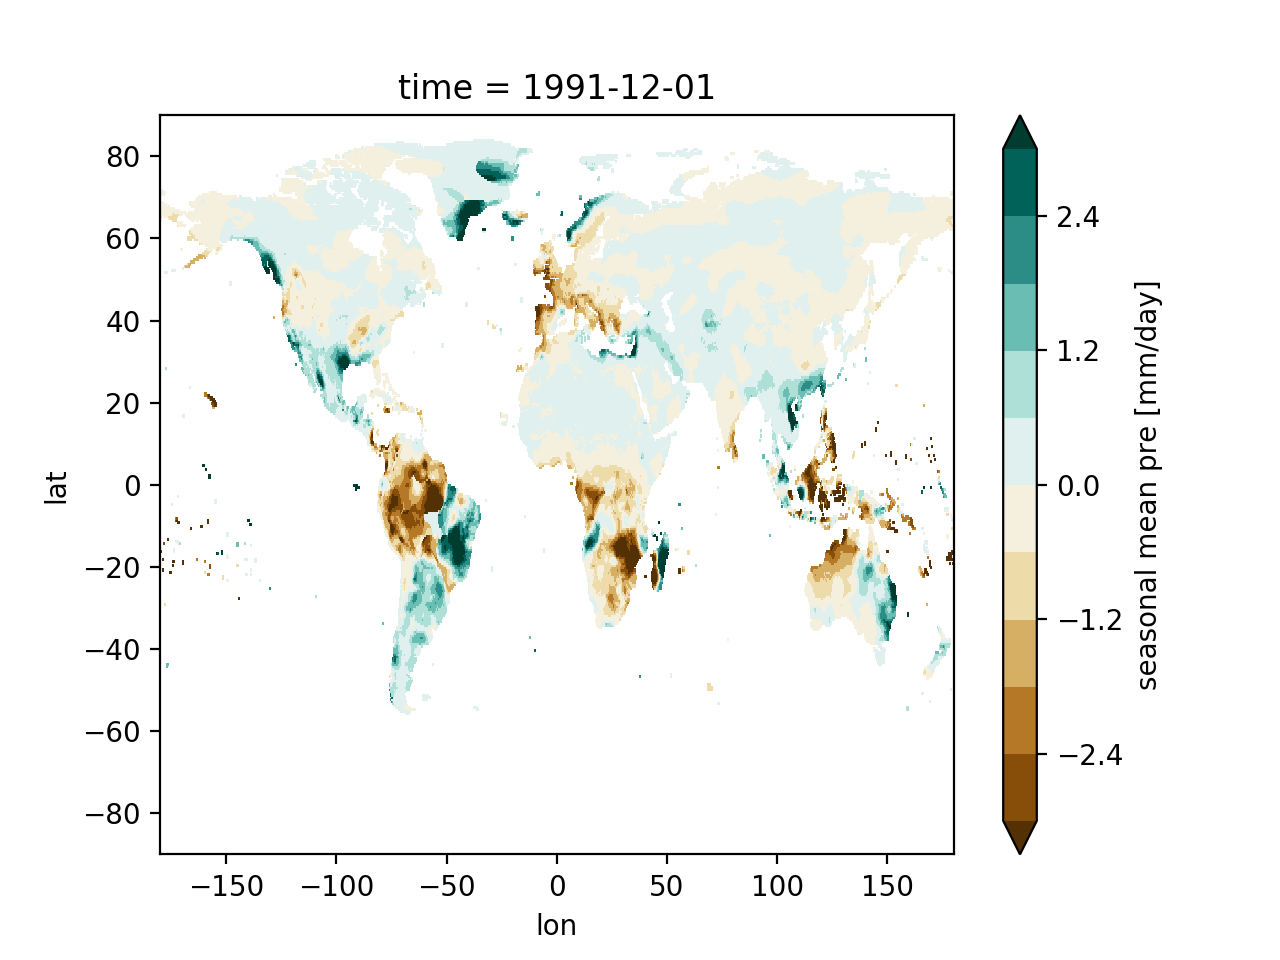

In [120]:
# following winter
daa.sel(time=f'{year_erupt}-12').pipe(lambda x: x/30.0).rename(f'seasonal mean {data_name} [{units}]')\
    .plot(robust=True, levels=10, cmap='BrBG')

<IPython.core.display.Javascript object>


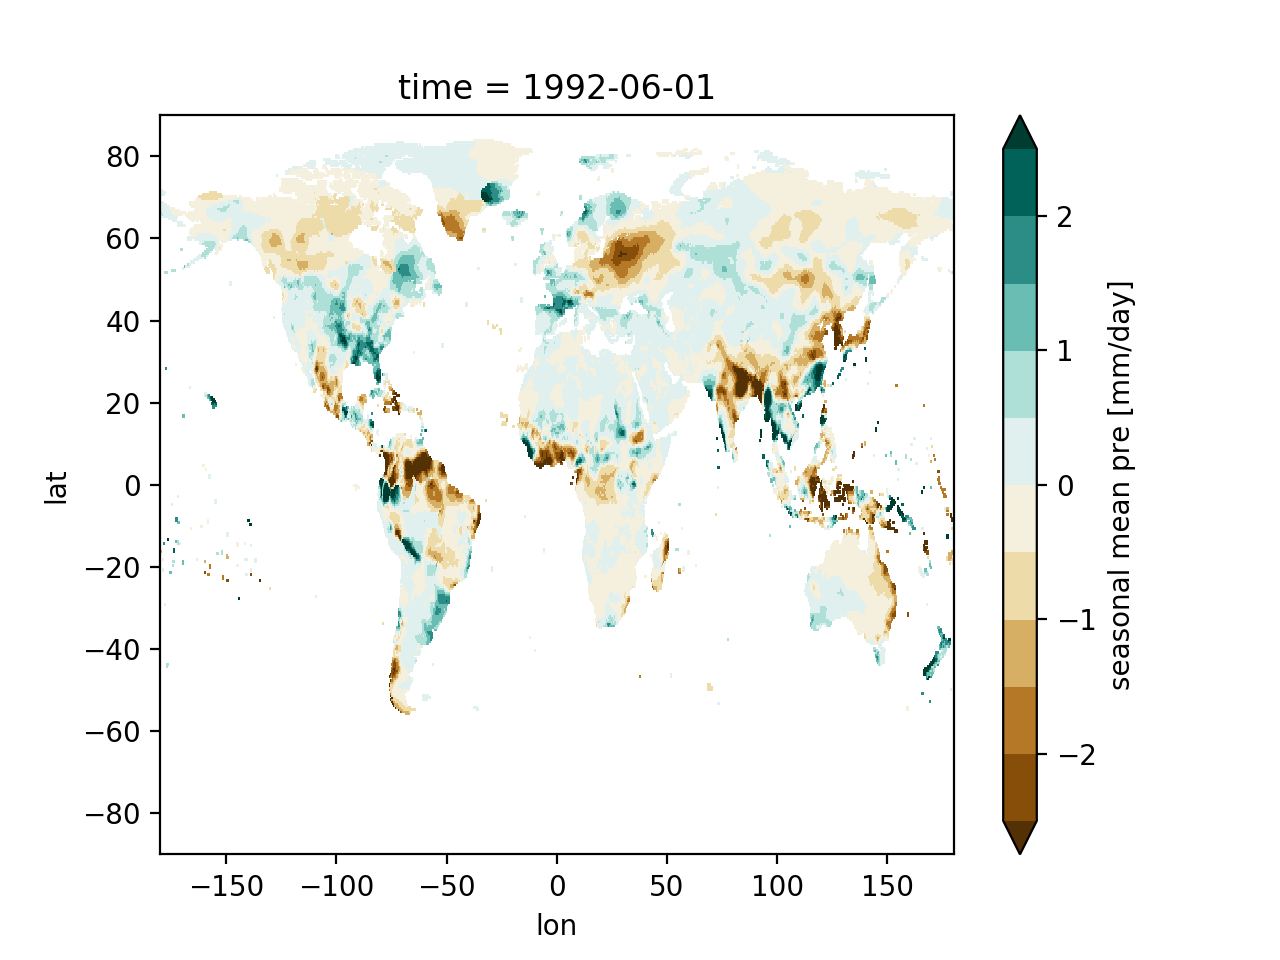

In [121]:
# next-year summer
daa.sel(time=f'{year_erupt+1}-06').pipe(lambda x: x/30.0).rename(f'seasonal mean {data_name} [{units}]')\
    .plot(robust=True, levels=10, cmap='BrBG')

<IPython.core.display.Javascript object>


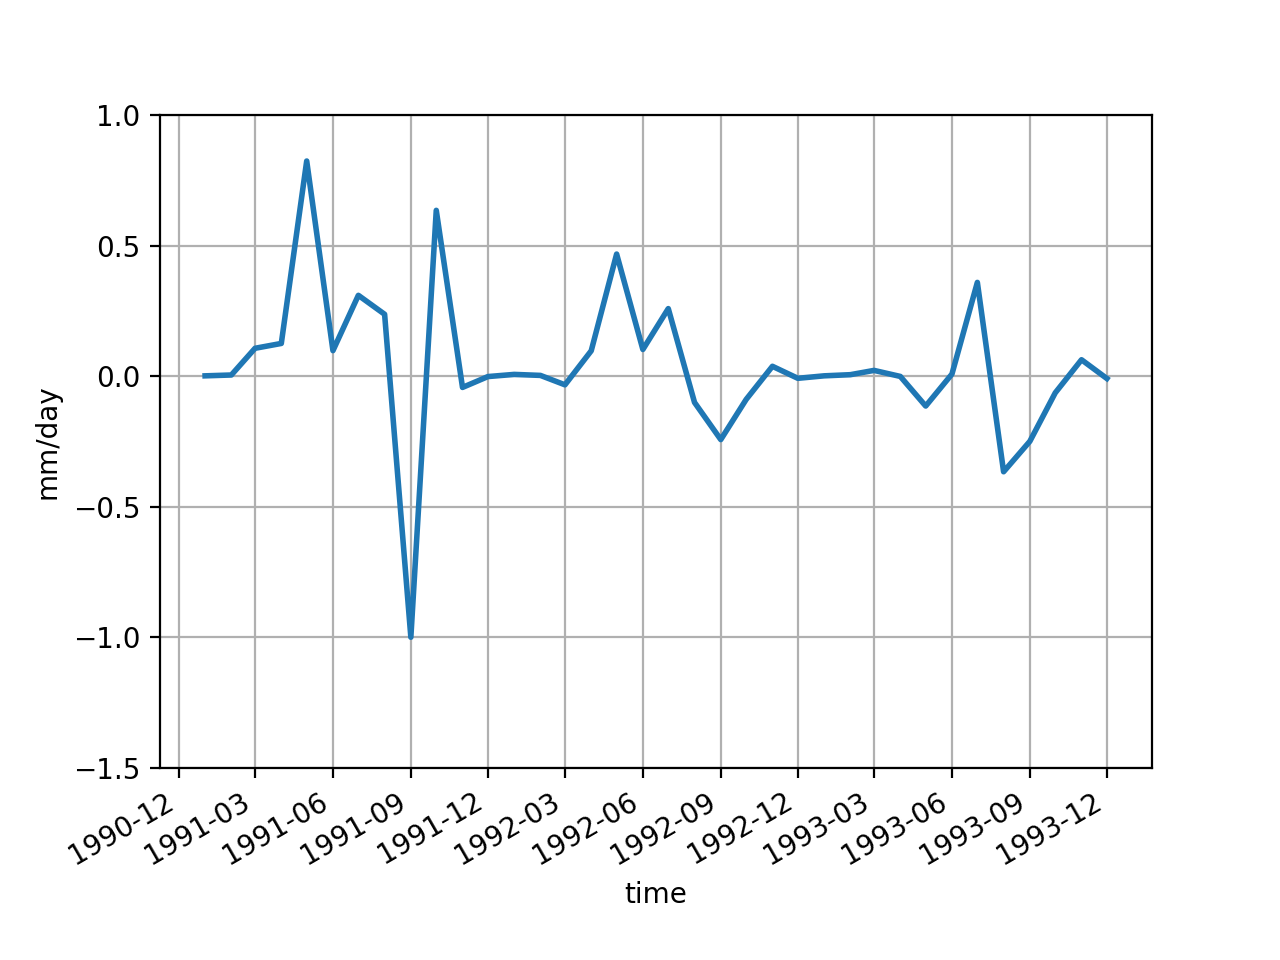

(-1.5, 1)

In [123]:
# Sahel rainfall time series
ts_ = ts.sel(time=years_after).groupby('time.month') \
    - ts.sel(time=years_before).groupby('time.month').mean('time') # anomaly
ts_.pipe(lambda x: x/30.).plot()
xticksmonth(range(3,13,3))
plt.grid(True)
plt.ylabel(units)
plt.ylim(-1.5, 1)